# 复现中国虚拟水研究的结果

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## 测试一下数据并理解

**测试一下 2008 年的国内虚拟水贸易总额**

In [54]:
total = pd.read_csv(r"data/NVWI_Inter_Total.csv")
total_2008 = total.groupby("Year").get_group(2008).iloc[:, 3:]
total_2008[total_2008 > 0].sum().sum() / 1000
total_2008[total_2008 < 0].abs().sum().sum() / 1000
total_2008[total_2008 < 0].abs().iloc[:, :6].sum().sum() / 1000
total_2008.sum().sum()/1000
# plt.ylabel("Billion")

279.488872655585

280.32846206048464

207.76623550902843

-0.8395894048996332

原来文章里用的 Virtual Water Flow 是所有谷物加起来的数值！！！终于搞明白了

**测试一下 green + blue 是不是等于 total**

In [3]:
green = pd.read_csv(r"green_nvwi_inner.csv")
blue = pd.read_csv(r"blue_nvwi_inner.csv")

green_2008 = green.groupby("Year").get_group(2008).iloc[:, 3:]
blue_2008 = blue.groupby("Year").get_group(2008).iloc[:, 3:]

In [4]:
green_2008[green_2008 > 0].sum().sum() / 1000 + blue_2008[blue_2008 > 0].sum().sum() / 1000

279.48887265558506

这说明 green + blue 和 total 是一样的

**国内总的 WF 消耗量**

In [5]:
wfc_total = pd.read_csv(r"data/WFC_Total.csv")

wfc_total_2008 = total.groupby("Year").get_group(2008).iloc[:, 3:]
wfc_total_2008[wfc_total_2008 > 0].sum().sum() / 1000
wfc_total_2008.abs().sum().sum()/1000

279.488872655585

559.8173347160697

**国内总的 WF 生产量**

In [8]:
wf_total = pd.read_csv(r"data/WF_Total.csv")
wf_total_2008 = total.groupby("Year").get_group(2008).iloc[:, 3:]
wf_total_2008[wf_total_2008 > 0].sum().sum() / 1000
wf_total_2008.abs().sum().sum()/1000

279.488872655585

559.8173347160697

看来两者除了有没有贸易数据意外，没有任何区别

## 一些基本统计分析

**看看全国平均的粮食消费和表对得上不**

(0.0, 700.0)

(1978.0, 2008.0)

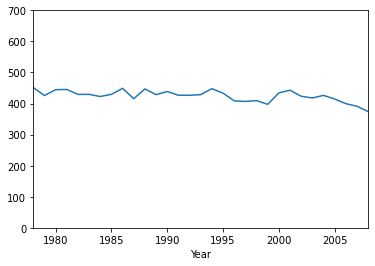

In [49]:
## 这一段是在测试 WFC 数据里有没有负值
# for col in wfc_total:
#     try:
#         print(f"Testing {col}")
#         if any(wfc_total[col] < 0):
#             print(f"There are neagtive values in col {col}.")
#         else:
#             pass
#     except:
#         print("No")

test = wfc_total.groupby("Year").sum().iloc[:, 1:7].abs().sum(axis=1).loc[1978: 2008]/1000
test.plot()
plt.ylim(0,700)
plt.xlim(1978, 2008)

可以看出，总的贸易量维持在0，所以国内总体来说出口与进口是相似的。

单位是 $M m^3$ 即百万

和 billion 相比以 1000 为单位换算